In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("news.csv")

In [3]:
data.drop(['title'],axis=1,inplace=True)
data.head(5)

,Unnamed: 0,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,It's primary day in New York and front-runners...,REAL


In [4]:
#lower casing all the text
data['text'] = data['text'].apply(lambda x: x.lower())
data.head(5)

,Unnamed: 0,text,label
0,8476,"daniel greenfield, a shillman journalism fello...",FAKE
1,10294,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,u.s. secretary of state john f. kerry said mon...,REAL
3,10142,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,875,it's primary day in new york and front-runners...,REAL


In [5]:
#removing punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)

In [6]:
data.head()

,Unnamed: 0,text,label
0,8476,daniel greenfield a shillman journalism fellow...,FAKE
1,10294,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,us secretary of state john f kerry said monday...,REAL
3,10142,— kaydee king kaydeeking november 9 2016 the l...,FAKE
4,875,its primary day in new york and frontrunners h...,REAL


label
FAKE    3164
REAL    3171
Name: text, dtype: int64


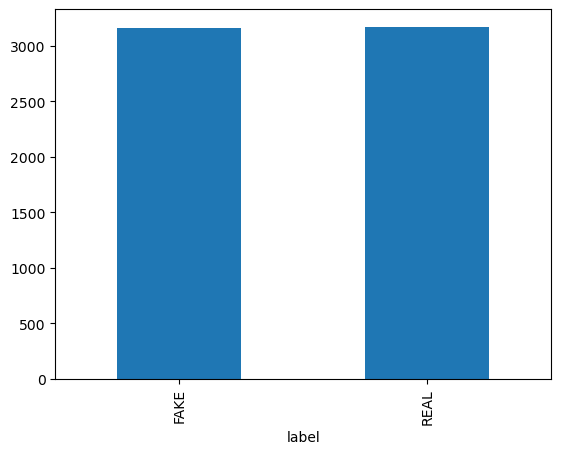

In [7]:
# total fake and real news 
print(data.groupby(['label'])['text'].count())
data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [15]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size = 0.2, random_state = 42)

In [17]:
x_train.head()

1142    donald trump received a key endorsement for hi...
2654    nina november 6 2016  239 pm \npolish governme...
5395    time investigating hillary is an attack on all...
1170    takis magazine october 28 2016 \nthis election...
4371    pakistan pakistans cricketer turned politician...
Name: text, dtype: object

In [18]:
y_train.head()

1142    REAL
2654    FAKE
5395    FAKE
1170    FAKE
4371    FAKE
Name: label, dtype: object

In [24]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm,classes,
                         normalize = False,
                         title = 'Confusion Matrix',
                         cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalization")
    
    thresh = cm.max() /2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = "center",
                color = "white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    

In [19]:
from sklearn.tree import DecisionTreeClassifier
#vectorizing and applying TF-IDF
pipe = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),
                 ('model',DecisionTreeClassifier(criterion= 'entropy',max_depth= 20,splitter= 'best',random_state= 42))])
#fitting the model
model = pipe.fit(x_train,y_train)
#accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test,prediction)*100,2)))

accuracy: 80.35%


Confusion Matrix, Without Normalization


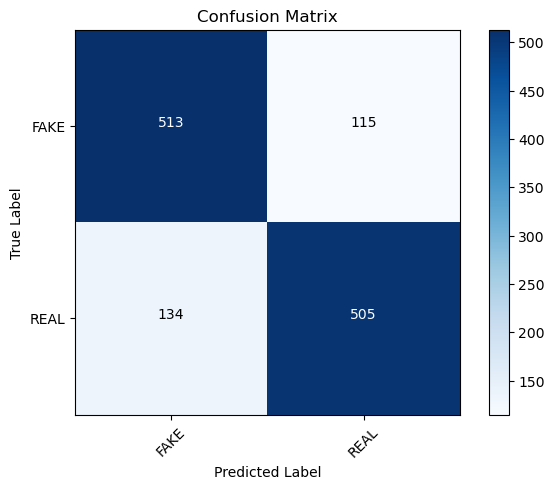

In [25]:
cm = metrics.confusion_matrix(y_test,prediction)
plot_confusion_matrix(cm,classes=["FAKE","REAL"])